In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl

from subprocess import Popen, PIPE, check_call
from os import makedirs,getcwd
from os.path import exists, isfile
import datetime
from shutil import copy
from glob import glob
from time import sleep
now = datetime.datetime.now()
plt.rc('text', usetex=True)

# $$ --------------------------------- \\ Submit~Job $$

In [2]:
path = "/home/andreasko/reachability/simulationen/2015_04_21/results/"
cum  = []
pre  = []
mem  = []
preMax = []
ensemble = ['250','700','0']
memories = [np.arange(7,63,7),np.arange(63,182,7),np.arange(182,372,7)]

sim_mem = []
sim_tim = []

for ii in range(3):
    for memory in memories[ii]:
        fname = path + "m="+str(memory)+"_"+ensemble[ii]+"d.npz"
        try:
            result = np.load(fname)
        except IOError:
            sim_mem.append(memory)
            sim_tim.append(ensemble[ii])

print "To do: memory   ensemble"
for jj in range(len(sim_mem)):
    print "     " + str(sim_mem[jj]) + "     " + str(sim_tim[jj])
    
print "number of jobs: ", len(sim_mem)

To do: memory   ensemble
     77     700
     84     700
     168     700
     175     700
     182     0
     196     0
     210     0
     217     0
     252     0
     266     0
     273     0
     280     0
     287     0
     294     0
     301     0
     315     0
     322     0
     329     0
     336     0
     343     0
     350     0
number of jobs:  21


In [6]:
print sim_tim

['700', '700', '700', '700', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']


In [ ]:
graph           = "pig_trade_11-14_uvdw_from_v0_2.dat"
path            = "/home/andreasko/reachability/simulationen/" + now.strftime("%Y_%m_%d") + "/"
model           = "SIR"
memories        = sim_mem
r0              = 0
memory_efficient= 1
simulation_time = sim_tim

if not exists(path):
    makedirs(path)
    makedirs(path + 'results/')
files = glob(getcwd()+"/*.py")
files.append(getcwd()+"/job")
files.append(getcwd()+"/Simulation.ipynb")
for afile in files:
    copy(afile, path)
    
for ii in range(len(memories)):
    jobname = "m="+str(memories[ii])+"_" +str(simulation_time[ii])+ "d"
    process = Popen("qsub -o %s -m e -mem 5 -speed 2 -env PYTHONPATH=%s -args '%s %s %s %s %s %s %s %s' job" 
        %(path+jobname,"$PYTHONPATH:.",memories[ii],model,graph,r0,memory_efficient,path,jobname,simulation_time[ii]), shell=True, stdout=PIPE, stderr=PIPE)
    print process.stdout.read()
    print process.stderr.read()
    sleep(2)

 ___________________________________________
/ ----------------------------------------- \
| | DIE Q INFORMIERT:                     | |
| | Condor under normal Operation   !     | |
| | Die Option speed option wurde geändert| |
\ ----------------------------------------- /
 -------------------------------------------
        \   ^__^
         \  (oo)\_______
            (__)\       )\/\
                ||----w |
                ||     ||
This is qpy-condor wrapper for qsub.
send comments or bug-reports to root@itp.tu-berlin.de
Set memtype to 5
Set speed type to 2
Add environmental variables 'PYTHONPATH=/usr/glocal/lib64/python2.7/site-packages:/usr/local/lib64/python2.7/site-packages:.' to executed job.
Pass Argument '77 SIR pig_trade_11-14_uvdw_from_v0_2.dat 0 1 /home/andreasko/reachability/simulationen/2015_04_27/ m=77_700d 700' to submitted binary.
Workgroup agschoell detected!

Preparing submission file, please wait
Output file: /home/andreasko/reachability/simulationen/2015_04_27

# $$ --------------------------------- \\ Dateien ~ einlesen $$

In [8]:
path = "/home/andreasko/reachability/simulationen/2015_04_23/results/"
cum  = []
pre  = []
mem  = []
preMax = []
ensemble = 200
memories = np.arange(1,24,1)

for memory in memories:
    try:
        result = np.load(path + "m="+str(memory)+"_"+str(ensemble)+"d.npz")
    except IOError:
        print memory,": missing file"
    else:
        cum.append(result['mean_cumulative'])
        pre.append(result['mean_prevalence'])
        mem.append(memory)
        preMax.append(np.max(result['mean_cumulative']))
        print memory,": OK"


1 : missing file
2 : missing file
3 : missing file
4 : missing file
5 : missing file
6 : missing file
7 : missing file
8 : missing file
9 : missing file
10 : missing file
11 : missing file
12 : missing file
13 : missing file
14 : missing file
15 : missing file
16 : missing file
17 : missing file
18 : missing file
19 : missing file
20 : missing file
21 : missing file
22 : missing file
23 : missing file


# $$ --------------------------------- \\ (kumulierte) ~ Prävalenz$$

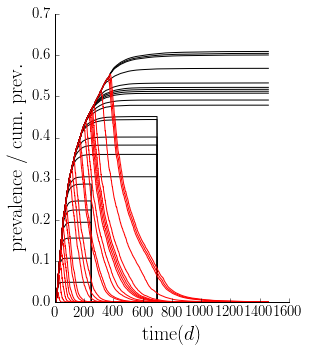

In [7]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0.25,0.15,0.65,0.8])
ax.set_xlabel(r'$\mathrm{time }(d)$', fontsize=20)
ax.set_ylabel(r'$\mathrm{prevalence~/~cum.~prev.}$', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#ax.set_xlim(right=700)

for ii in range(len(mem)):
    ax.plot(cum[ii],'k-',linewidth=1)
    ax.plot(pre[ii],'r-',linewidth=1)

#plt.savefig('HIT_prevalence',format='pdf')

# $$ --------------------------------- \\ maximale ~ Anzahl ~ an ~ Infizierten $$

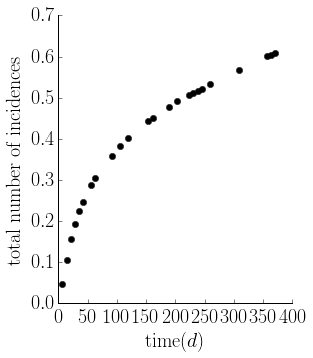

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0.25,0.15,0.65,0.8])
ax.set_xlabel(r'$\mathrm{time }(d)$', fontsize=20)
ax.set_ylabel(r'$\mathrm{total~number~of~incidences}$', fontsize=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#ax.set_xlim(right=360)

ax.plot(mem,preMax,'ko')
#plt.savefig('HIT_total',format='pdf')